In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121

In [2]:
# Veri setini yükleme ve işleme adımları
data = pd.read_csv(r"/kaggle/input/hardfakevsrealfaces/data.csv")

# Resim boyutları
height, width = 224, 224

# Resimleri yükleme ve işleme
X = np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img = load_img(r"/kaggle/input/hardfakevsrealfaces/{}/{}.jpg".format(data.loc[i, 'label'], data.loc[i, 'images_id']),
                   target_size=(height, width))
    # Piksel değerlerini [0, 1] aralığına normalleştirme
    img_array  = img_to_array(img)
    img_array /= 255.0
    X[i] = img_array

# Etiketleri değiştirme
def changeLabels(x):
    return labels[x]

labels = data.label.unique()
labels = {labels[i]: i for i in range(labels.size)}
y = data.label.apply(changeLabels)

# One-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, len(labels))

# Veri setini train-test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [3]:
# DenseNet121 modelini yükleme
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Transfer learning: DenseNet121 modelinin üstüne yeni katmanlar ekleyerek özelleştirme
x = Flatten()(densenet.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45)(x)
output = Dense(len(labels), activation='softmax')(x)

# Yeni modeli oluşturma
model_densenet = Model(densenet.input, output)

# Modeli derleme
model_densenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15



29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Modelin eğitimi
stats_densenet = model_densenet.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/15


I0000 00:00:1716632901.250277     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716632901.432774     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.7825 - loss: 13.1536

W0000 00:00:1716633018.795684     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7871 - loss: 12.8660   

W0000 00:00:1716633029.052571     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 321s 6s/step - accuracy: 0.7915 - loss: 12.5996 - val_accuracy: 0.4879 - val_loss: 185.4061
Epoch 2/15


W0000 00:00:1716633045.056946     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.9832 - loss: 0.3504 - val_accuracy: 0.6087 - val_loss: 118.7836
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - accuracy: 0.9754 - loss: 0.4358 - val_accuracy: 0.5459 - val_loss: 86.2241
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy: 0.9837 - loss: 0.4501 - val_accuracy: 0.8889 - val_loss: 4.0846
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.9892 - loss: 0.1378 - val_accuracy: 0.9855 - val_loss: 0.6371
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.9971 - loss: 0.0523 - val_accuracy: 0.9855 - val_loss: 0.5251
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.9981 - loss: 0.0102 - val_accuracy: 0.9855 - val_loss: 0.3089
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - accuracy: 0.9998 - loss: 2.7715e-04 - val_accuracy: 0.9952 - val_loss: 0.3451
Epoch 9/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 1.0000 - loss: 4.7519e-08 - val_accuracy: 0.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Accuracy:
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 0.0000e+00
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


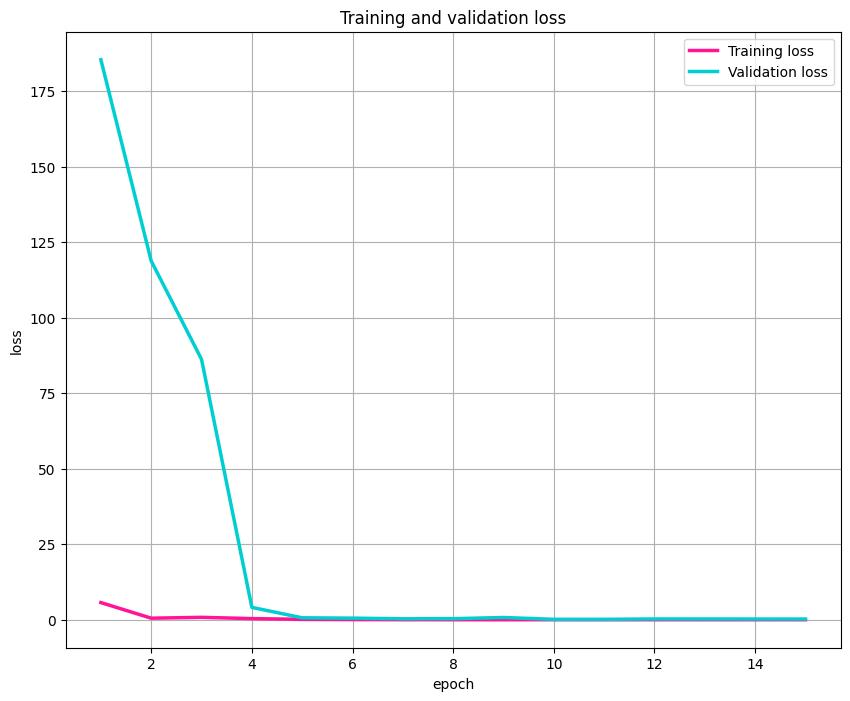

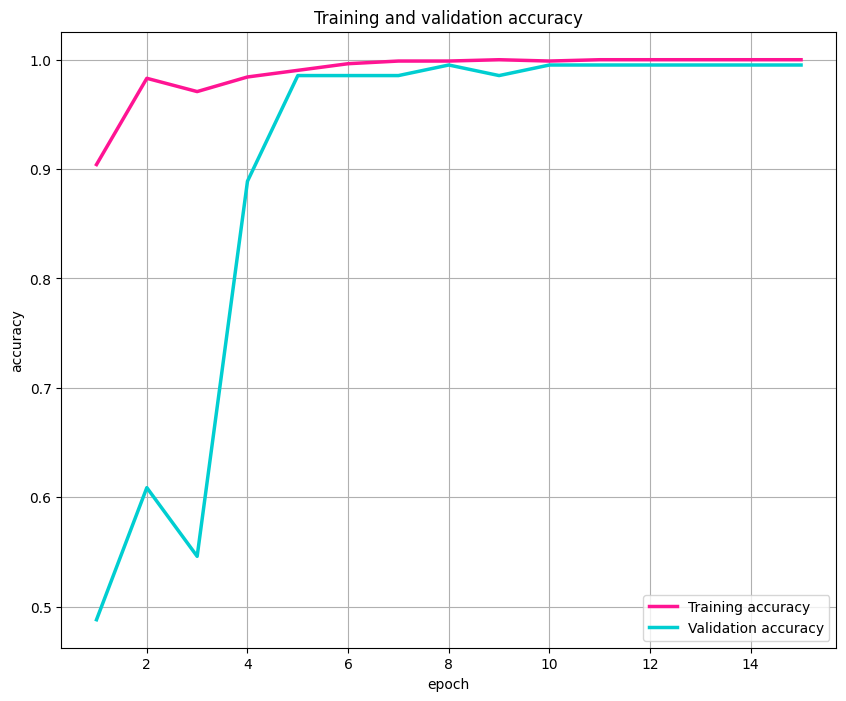

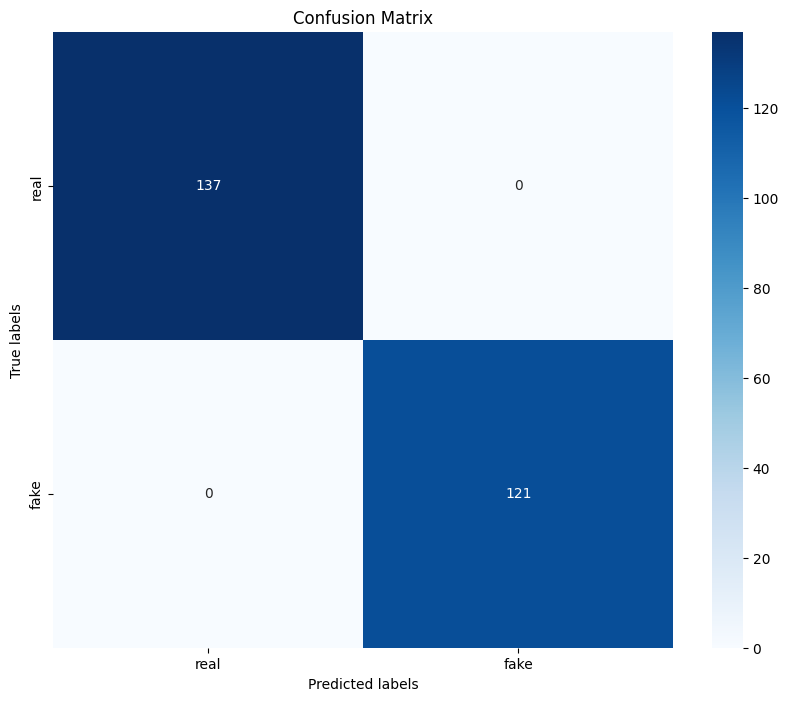

In [6]:
from sklearn.metrics import confusion_matrix
# Eğitim istatistiklerini görselleştirme
stats_densenet_df = pd.DataFrame(stats_densenet.history)
stats_densenet_df['epoch'] = list(range(1, epochs+1))

plt.figure(figsize=(10, 8))
sns.lineplot(y='loss', x='epoch', data=stats_densenet_df, color='deeppink', linewidth=2.5, label="Training loss")
sns.lineplot(y='val_loss', x='epoch', data=stats_densenet_df, color='darkturquoise', linewidth=2.5, label="Validation loss")
plt.grid()
plt.legend()
plt.title("Training and validation loss")

plt.figure(figsize=(10, 8))
sns.lineplot(y='accuracy', x='epoch', data=stats_densenet_df, color='deeppink', linewidth=2.5, label="Training accuracy")
sns.lineplot(y='val_accuracy', x='epoch', data=stats_densenet_df, color='darkturquoise', linewidth=2.5, label="Validation accuracy")
plt.grid()
plt.legend()
plt.title("Training and validation accuracy")

# Test verisi üzerinde modelin performansını değerlendirme
print('Accuracy:')
_, accuracy_densenet = model_densenet.evaluate(X_test, y_test)

# Confusion Matrix
# Predictions
y_pred_densenet = model_densenet.predict(X_test)
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)

# Confusion matrix
# Test veri kümesinden doğru etiketleri y_true olarak tanımla
y_true = np.argmax(y_test, axis=1)

confusion_mtx_densenet = confusion_matrix(y_true, y_pred_classes_densenet)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_densenet, annot=True, fmt='g', cmap='Blues', xticklabels=labels.keys(), yticklabels=labels.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()